# Representações de Texto: Bag of Words e TF-IDF

Neste notebook, vamos explorar duas formas clássicas de representar textos para modelos de Machine Learning:  
- **Bag of Words (BoW)**  
- **TF-IDF (Term Frequency-Inverse Document Frequency)**

Vamos aplicar essas técnicas na prática com exemplos simples.

In [ ]:
# Instalar bibliotecas
!pip install scikit-learn pandas matplotlib --quiet


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # servem para BOW e TF-IDF, respectivamente
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Lista de frases que usaremos em um exemplo simples
corpus = [
    "O cachorro correu pelo parque",
    "O gato dormiu no sofá",
    "O cachorro e o gato brincaram juntos no parque",
    "A menina caminhou com seu cachorro no parque"
]

print("Corpus:\n")
for i, frase in enumerate(corpus):
    print(f"{i+1}. {frase}")


Corpus:

1. O cachorro correu pelo parque
2. O gato dormiu no sofá
3. O cachorro e o gato brincaram juntos no parque
4. A menina caminhou com seu cachorro no parque


#BAG-OF-WORDS

In [ ]:
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(corpus)

# Mostrar a matriz BoW
df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())
df_bow.index = [f"Frase {i+1}" for i in range(len(corpus))]
df_bow


,brincaram,cachorro,caminhou,com,correu,dormiu,gato,juntos,menina,no,parque,pelo,seu,sofá
Frase 1,0,1,0,0,1,0,0,0,0,0,1,1,0,0
Frase 2,0,0,0,0,0,1,1,0,0,1,0,0,0,1
Frase 3,1,1,0,0,0,0,1,1,0,1,1,0,0,0
Frase 4,0,1,1,1,0,0,0,0,1,1,1,0,1,0


**O que está acontecendo?**

Cada linha representa uma frase.

Cada coluna representa uma palavra do vocabulário.

Os valores mostram quantas vezes a palavra aparece na frase.


#TF-IDF

In [ ]:
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(corpus)

# Mostrar a matriz TF-IDF
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
df_tfidf.index = [f"Frase {i+1}" for i in range(len(corpus))]
df_tfidf.round(3)


,brincaram,cachorro,caminhou,com,correu,dormiu,gato,juntos,menina,no,parque,pelo,seu,sofá
Frase 1,0.00,0.380,0.000,0.000,0.596,0.000,0.000,0.00,0.000,0.000,0.380,0.596,0.000,0.000
Frase 2,0.00,0.000,0.000,0.000,0.000,0.575,0.453,0.00,0.000,0.367,0.000,0.000,0.000,0.575
Frase 3,0.51,0.326,0.000,0.000,0.000,0.000,0.402,0.51,0.000,0.326,0.326,0.000,0.000,0.000
Frase 4,0.00,0.279,0.438,0.438,0.000,0.000,0.000,0.00,0.438,0.279,0.279,0.000,0.438,0.000


**O que muda no TF-IDF?**

Palavras muito frequentes no corpus inteiro recebem pesos menores.

Palavras mais informativas (raras) recebem pesos maiores.

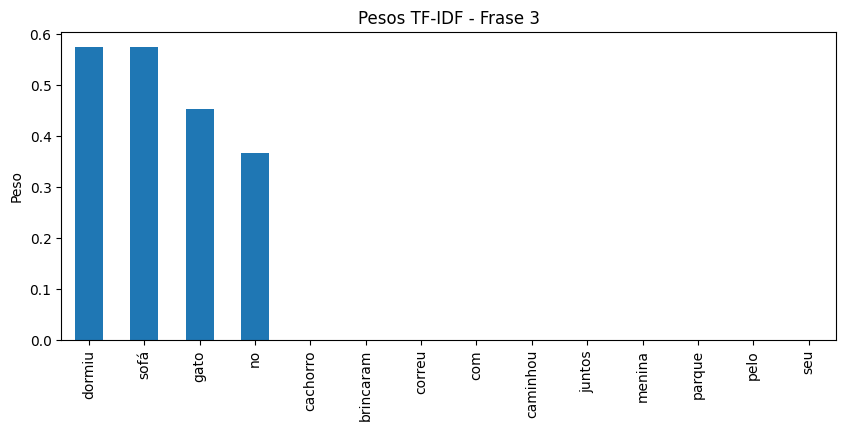

In [ ]:
# Visualizar pesos de uma frase
df_tfidf.loc["Frase 1"].sort_values(ascending=False).plot(kind='bar', figsize=(10,4), title="Pesos TF-IDF - Frase 3") #você pode trocar aqui qual frase quer visualizar
plt.ylabel("Peso")
plt.show()


In [ ]:
#Comparando BOW com TF-IDF

print("Vocabulário:", vectorizer_bow.get_feature_names_out())
print("\nBoW - Frase 3:\n", df_bow.loc["Frase 3"])
print("\nTF-IDF - Frase 3:\n", df_tfidf.loc["Frase 3"].round(3))


Vocabulário: ['brincaram' 'cachorro' 'caminhou' 'com' 'correu' 'dormiu' 'gato' 'juntos'
 'menina' 'no' 'parque' 'pelo' 'seu' 'sofá']

BoW - Frase 3:
 brincaram    1
cachorro     1
caminhou     0
com          0
correu       0
dormiu       0
gato         1
juntos       1
menina       0
no           1
parque       1
pelo         0
seu          0
sofá         0
Name: Frase 3, dtype: int64

TF-IDF - Frase 3:
 brincaram    0.510
cachorro     0.326
caminhou     0.000
com          0.000
correu       0.000
dormiu       0.000
gato         0.402
juntos       0.510
menina       0.000
no           0.326
parque       0.326
pelo         0.000
seu          0.000
sofá         0.000
Name: Frase 3, dtype: float64


**Conclusão**

- O BoW conta palavras, mas não leva em conta a importância delas.

- O TF-IDF pondera as palavras considerando o quão comuns ou raras elas são no corpus.

#Considerando as Stopwords do português

In [ ]:
# Instalar nltk
!pip install nltk --quiet


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Lista de stopwords em português
stopwords_pt = stopwords.words('portuguese')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# BoW com stopwords em português
vectorizer_bow_sw = CountVectorizer(stop_words=stopwords_pt)
X_bow_sw = vectorizer_bow_sw.fit_transform(corpus)

df_bow_sw = pd.DataFrame(X_bow_sw.toarray(), columns=vectorizer_bow_sw.get_feature_names_out())
df_bow_sw.index = [f"Frase {i+1}" for i in range(len(corpus))]
df_bow_sw


,brincaram,cachorro,caminhou,correu,dormiu,gato,juntos,menina,parque,sofá
Frase 1,0,1,0,1,0,0,0,0,1,0
Frase 2,0,0,0,0,1,1,0,0,0,1
Frase 3,1,1,0,0,0,1,1,0,1,0
Frase 4,0,1,1,0,0,0,0,1,1,0


In [ ]:
# TF-IDF com stopwords em português
vectorizer_tfidf_sw = TfidfVectorizer(stop_words=stopwords_pt)
X_tfidf_sw = vectorizer_tfidf_sw.fit_transform(corpus)

df_tfidf_sw = pd.DataFrame(X_tfidf_sw.toarray(), columns=vectorizer_tfidf_sw.get_feature_names_out())
df_tfidf_sw.index = [f"Frase {i+1}" for i in range(len(corpus))]
df_tfidf_sw.round(3)


,brincaram,cachorro,caminhou,correu,dormiu,gato,juntos,menina,parque,sofá
Frase 1,0.000,0.474,0.000,0.742,0.000,0.000,0.000,0.000,0.474,0.000
Frase 2,0.000,0.000,0.000,0.000,0.618,0.487,0.000,0.000,0.000,0.618
Frase 3,0.539,0.344,0.000,0.000,0.000,0.425,0.539,0.000,0.344,0.000
Frase 4,0.000,0.380,0.596,0.000,0.000,0.000,0.000,0.596,0.380,0.000


In [ ]:
!pip install wordcloud --quiet


In [ ]:
# WordCloud com stopwords em português
texto_todo = " ".join(corpus)

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=set(stopwords_pt)).generate(texto_todo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud do Corpus (com stopwords em português removidas)")
plt.show()


NameError: name 'WordCloud' is not defined

# DESAFIO

In [ ]:
novo_corpus = [
    "A escola abriu as portas para a comunidade",
    "Os alunos participaram de uma feira cultural",
    "A comunidade compareceu em peso ao evento",
    "Foi um dia cheio de atividades e apresentações"
]


**EXERCÍCIO 01:**

1. Crie uma matriz BoW para o novo_corpus.

2. Remova stopwords em português.

3. Exiba a matriz em forma de DataFrame.

4. Qual palavra aparece em mais frases? E qual só aparece uma vez?

5. Escolha uma frase e explique como ela foi representada vetorialmente.

In [ ]:
# Seu código vem aqui

**EXERCÍCIO 02:**



1.   Crie uma matriz TF-IDF para o novo_corpus.

2.   Remova stopwords em português.

3.   Exiba a matriz TF-IDF arredondando para 3 casas decimais.

4.   Qual palavra recebeu o maior peso TF-IDF em qualquer frase?

5.   Escolha uma frase e interprete os pesos TF-IDF das palavras dela: por que algumas receberam pesos maiores?



In [ ]:
# Seu código vem aqui